Loading MNIST dataset...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Applying PCA for dimensionality reduction...
Fitting Gaussian Mixture Model...
Predicting clusters...


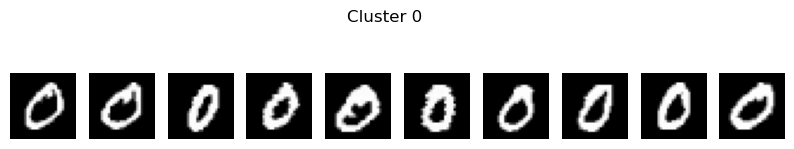

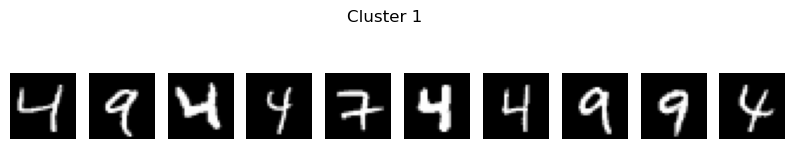

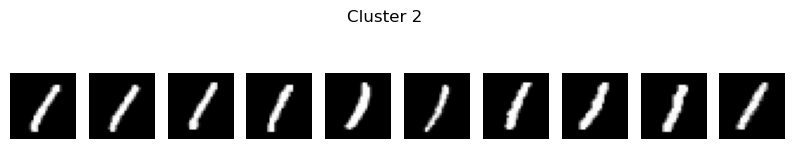

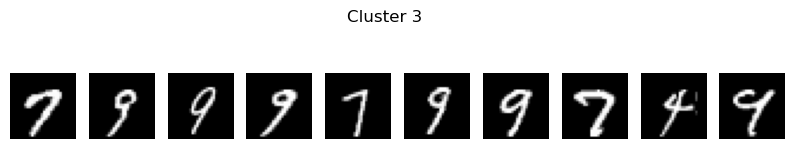

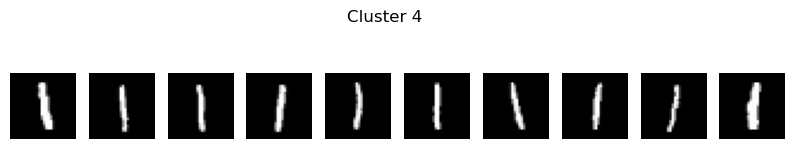

Clustering completed successfully!


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data.to_numpy().astype(np.float32) / 255.0  # Normalize pixel values
y = mnist.target.astype(int)

# Apply PCA for dimensionality reduction
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

# Fit Gaussian Mixture Model
print("Fitting Gaussian Mixture Model...")
num_clusters = 10  # We expect 10 clusters (digits 0-9)
gmm = GaussianMixture(n_components=num_clusters, covariance_type="full", random_state=42)
gmm.fit(X_reduced)

# Predict clusters for each sample
print("Predicting clusters...")
clusters = gmm.predict(X_reduced)

# Function to plot images from a specific cluster
def plot_cluster_images(cluster_number, num_samples=10):
    indices = np.where(clusters == cluster_number)[0][:num_samples]
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, idx in enumerate(indices):
        axes[i].imshow(X[idx].reshape(28, 28), cmap="gray")  # Reshape back to 28x28 images
        axes[i].axis("off")
    plt.suptitle(f"Cluster {cluster_number}")
    plt.show()

# Plot 5 clusters
for i in range(5):
    plot_cluster_images(i)

print("Clustering completed successfully!")
